# Cross-Validating Models

In [3]:
from sklearn.datasets import load_digits
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
pipemodel = make_pipeline(StandardScaler(), LogisticRegression())

In [7]:
digits = load_digits()
features = digits.data
target = digits.target

In [11]:
k = KFold(n_splits=10, shuffle = True)

In [18]:
scores = cross_val_score(pipemodel, features, target, cv=k , scoring='accuracy', n_jobs =-1);#n_jobs decides how many cores used for this mission

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
scores.mean()

0.9693947858472998

# Creating a Baseline Regression Model

In [44]:
from sklearn.dummy import DummyRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
boston = load_boston()

In [27]:
features, target = boston.data, boston.target

In [29]:
features.shape

(506, 13)

In [33]:
Xtrain, Xtest,ytrain, ytest = train_test_split(features, target, test_size=0.1)

In [34]:
Xtrain.shape

(455, 13)

In [35]:
Xtest.shape

(51, 13)

In [42]:
base = DummyRegressor(strategy ='mean')
base.fit(Xtrain, ytrain)
base.score(Xtest, ytest)

-0.022933719798110763

In [46]:
linear = LinearRegression()
linear.fit(Xtrain, ytrain)
linear.score(Xtest, ytest)

0.7725861219950191

In [48]:
base2 = DummyRegressor(strategy='constant', constant=20) # By default, score returns the coefficient of determination (R-squared, R2 ) score:
base2.fit(Xtrain, ytrain)
base2.score(Xtest, ytest)

-0.16371528119678258

# Creating a Baseline Classification Model

In [57]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
X = load_iris().data
y = load_iris().target

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.1)

In [54]:
baseclass = DummyClassifier(strategy='uniform')
baseclass.fit(Xtrain, ytrain)
baseclass.score(Xtest, ytest)

0.6666666666666666

In [55]:
baseclass2 = DummyClassifier(strategy='stratified')
baseclass2.fit(Xtrain, ytrain)
baseclass2.score(Xtest, ytest)

0.4

In [58]:
forest = RandomForestClassifier()
forest.fit(Xtrain, ytrain)
forest.score(Xtest, ytest)

0.9333333333333333

# Evaluating Binary Classifier Predictions

In [60]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [63]:
X,y = make_classification(n_samples=1000, n_features=3, n_informative =3, n_redundant=0, n_classes=2)
model = LogisticRegression()

In [66]:
cross_val_score(model, X, y, scoring='accuracy', cv=10, n_jobs=-1).mean()

0.755

In [71]:
cross_val_score(model, X, y, scoring='precision',cv=10, n_jobs=-1).mean() # when you have unbalanced data

0.7569971445060615

In [69]:
cross_val_score(model, X, y, scoring='recall',cv=10, n_jobs=-1 ).mean()

0.7575510204081632

In [70]:
cross_val_score(model, X, y, scoring='f1',cv=10, n_jobs=-1 ).mean()

0.7550165655986316

In [79]:
from sklearn.metrics import accuracy_score

In [82]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X,y, test_size=0.1)

In [83]:
y_model = model.fit(Xtrain1, ytrain1).predict(Xtest1)

In [84]:
accuracy_score(y_model, ytest1)

0.81

# Evaluating Binary Classifier Thresholds

In [96]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [97]:
X, y = make_classification(n_features=10, n_samples=1000, n_informative=3, n_classes=2)

In [98]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X,y, test_size=0.1)

In [101]:
Xtrain2.shape

(900, 10)

In [102]:
Xtest2.shape

(100, 10)

In [100]:
logit = LogisticRegression()

In [118]:
predictprob = logit.fit(Xtrain2,ytrain2).predict_proba(Xtest2)

In [108]:
ytest2.shape

(100,)

In [115]:
predictprob.shape

(100,)

In [130]:
false_positive_rate, true_positive_rate, threshold = roc_curve(ytest2,predictprob[:,1])

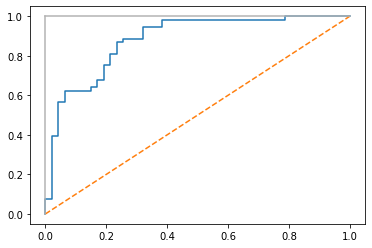

In [131]:
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7") 
plt.plot([1, 1] , c=".7")

In [132]:
logit.classes_

array([0, 1])

In [139]:
print('threshold:',threshold[20])
print('FPR:',false_positive_rate[20])
print('TPR:',true_positive_rate[20])

threshold: 0.5438782745856512
FPR: 0.2553191489361702
TPR: 0.8867924528301887


In [145]:
print('threshold:',threshold[8])
print('FPR:',false_positive_rate[8])
print('TPR:',true_positive_rate[8])

threshold: 0.7343322790611814
FPR: 0.06382978723404255
TPR: 0.6226415094339622


In [146]:
roc_auc_score(ytest2, predictprob[:,1]) #The closer the AUCROC is to 1, the better the model,calculate the area under the ROC curve

0.881172219991971

# Evaluating Multiclass Classifier Predictions

In [150]:
X1, y1 = make_classification(n_samples=10000, n_features=3, n_informative=3, n_redundant=0, n_classes=3)

In [151]:
logit2 = LogisticRegression()

In [153]:
cross_val_score(logit2, X1, y1, scoring='f1_macro', cv=3) #Calculate mean of metric scores for each class, weighting each class equally.

array([0.73464684, 0.72136979, 0.73053637])

In [155]:
cross_val_score(logit2, X1, y1, scoring='precision_micro', cv=3) #Calculate mean of metric scores for each observation-class combination.

array([0.73635273, 0.72127213, 0.73087309])

In [156]:
cross_val_score(logit2, X1, y1, scoring='recall_weighted', cv=3) # Calculate mean of metric scores for each class, weighting each class proportional to its size in the data.

array([0.73635273, 0.72127213, 0.73087309])

# Visualizing a Classifier’s Performance

In [167]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [161]:
digits=load_digits()

In [162]:
Xd = digits.data
yd = digits.target

In [163]:
Xdtrain, Xdtest, ydtrain, ydtest = train_test_split(Xd,yd, test_size=0.2)

In [164]:
Xdtrain.shape

(1437, 64)

In [165]:
Xdtest.shape

(360, 64)

In [166]:
modelclass = LogisticRegression()
ypredict = modelclass.fit(Xdtrain,ydtrain).predict(Xdtest)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


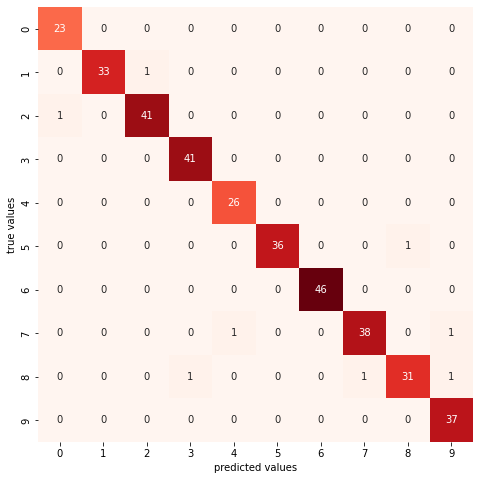

In [188]:
mat = confusion_matrix(ypredict, ydtest)
sns.heatmap(mat, annot=True, square=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('predicted values')
plt.ylabel('true values')
fig = plt.gcf()
fig.set_size_inches(10,8);

In [175]:
iris= load_iris()

In [176]:
Xs = iris.data
ys = iris.target

In [177]:
Xstrain, Xstest, ystrain, ystest = train_test_split(Xs,ys, test_size=0.2)

In [178]:
Xstrain.shape

(120, 4)

In [179]:
Xstest.shape

(30, 4)

In [180]:
modelclass.fit(Xstrain,ystrain)

LogisticRegression()

In [197]:
from sklearn.metrics import plot_confusion_matrix
import pandas as pd

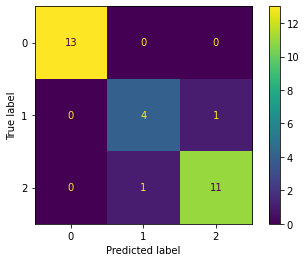

In [190]:
plot_confusion_matrix(modelclass, Xstest, ystest, values_format='d');

In [191]:
yspredict = modelclass.fit(Xstrain,ystrain).predict(Xstest)

In [198]:
mat2 = confusion_matrix(yspredict, ystest)
matdf = pd.DataFrame(mat2, index=iris.target_names, columns=iris.target_names)

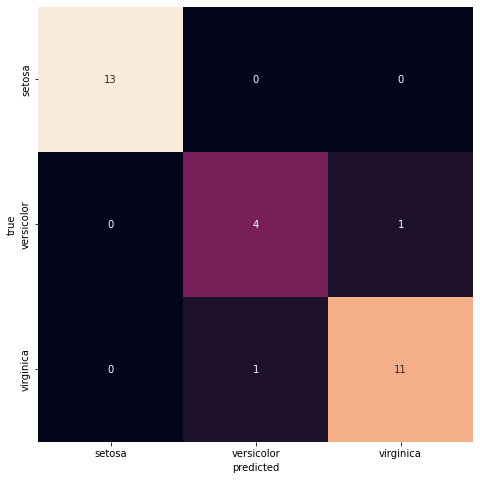

In [202]:
sns.heatmap(matdf, annot=True, cbar=False, fmt='d', square=True);
ax = plt.gca()
ax.set(xlabel='predicted', ylabel='true')
fig = plt.gcf()
fig.set_size_inches(10,8);

# Evaluating Regression Models

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [205]:
XL, yL = make_regression(n_features=3, n_informative=3, n_samples=100, n_targets=1, noise=50, coef=False)

In [206]:
lin = LinearRegression()

In [208]:
cross_val_score(lin, XL, yL, scoring='neg_mean_squared_error').mean()

-2620.779078310914

In [210]:
cross_val_score(lin, XL, yL, scoring='r2').mean()

0.7744640651819726

# Evaluating Clustering Models

In [211]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [212]:
X,y = make_blobs(n_samples=100, centers=2, cluster_std=0.6, shuffle=True)

In [216]:
modelK = KMeans(n_clusters=2)
y_ = modelK.fit(X).predict(X)

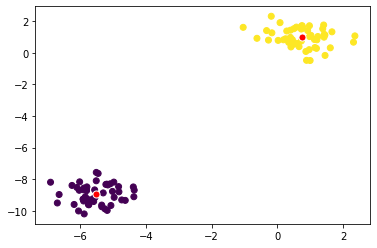

In [224]:
plt.scatter(X[:,0], X[:,1], c=y_)
plt.scatter(modelK.cluster_centers_[:,0], modelK.cluster_centers_[:,1], s=50, edgecolor='white', facecolor='red')

In [225]:
silhouette_score(X,y_) #The closer to 1.0, the better the model.

0.9057996354138822

In [226]:
modelK.labels_

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int32)

# Creating a Custom Evaluation Metric

In [231]:
from sklearn.datasets import make_regression
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import Ridge

In [230]:
Xm,ym = make_regression(n_samples=100 , n_features=3)

In [232]:
Xmtrain, Xmtest, ymtrain, ymtest = train_test_split(Xm, ym, test_size=0.1)

In [249]:
def make_matrix(ymtest, ympredicted):
    r2score = r2_score(ymtest, ympredicted)
    return r2score

In [250]:
score = make_scorer(make_matrix, greater_is_better=True)

In [269]:
modelR = Ridge(alpha=0.5)

In [270]:
modelR.fit(Xmtrain, ymtrain)

Ridge(alpha=0.5)

In [271]:
score(modelR, Xmtest, ymtest)

0.999962240704936

In [272]:
modelR.score(Xmtest, ymtest) # by default, score will give you R2 scores

0.999962240704936

In [273]:
ympredicted = modelR.fit(Xmtrain,ymtrain).predict(Xmtest)

In [274]:
r2_score(ymtest, ympredicted)

0.999962240704936

In [275]:
modelR.coef_

array([47.04594792, 29.88456234, 95.39699169])

In [276]:
modelR.intercept_

0.02921925250137747

# Visualizing the Effect of Training Set Size

In [277]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

In [291]:
digits.data.shape

(1797, 64)

In [280]:
train_size, train_scores, test_scores = learning_curve(RandomForestClassifier(), digits.data, digits.target, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50))

In [294]:
train_size

array([  16,   48,   81,  114,  146,  179,  212,  244,  277,  310,  342,
        375,  408,  440,  473,  506,  538,  571,  604,  636,  669,  702,
        734,  767,  800,  832,  865,  898,  930,  963,  996, 1028, 1061,
       1094, 1126, 1159, 1192, 1224, 1257, 1290, 1322, 1355, 1388, 1420,
       1453, 1486, 1518, 1551, 1584, 1617])

In [290]:
train_scores.shape

(50, 10)

In [285]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores,axis=1)

In [286]:
test_scores_mean = np.mean(test_scores,axis=1)
test_scores_std = np.std(test_scores,axis=1)

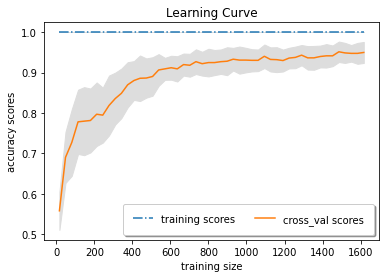

In [313]:
plt.plot(train_size, train_scores_mean, '-.', label='training scores')
plt.plot(train_size, test_scores_mean,'-', label='cross_val scores')

plt.fill_between(train_size, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color='#DDDDDD')
plt.fill_between(train_size, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std,color='#DDDDDD')
plt.legend(loc='lower right', ncol=2, borderpad=True, frameon=True,shadow=True)
plt.xlabel('training size')
plt.ylabel('accuracy scores')
plt.title('Learning Curve');

# Creating a Text Report of Evaluation Metrics

In [317]:
from sklearn.metrics import classification_report

In [314]:
modelLogit = LogisticRegression()

In [321]:
Xgtrain, Xgtest, ygtrain, ygtest = train_test_split(iris.data, iris.target, test_size=0.2)

In [322]:
predictyg = modelLogit.fit(Xgtrain, ygtrain).predict(Xgtest)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [323]:
print(classification_report(ygtest, predictyg, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.77      0.91      0.83        11
   virginica       0.83      0.62      0.71         8

    accuracy                           0.87        30
   macro avg       0.87      0.84      0.85        30
weighted avg       0.87      0.87      0.86        30



# Visualizing the Effect of Hyperparameter Values

In [326]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [327]:
train_scores, val_scores = validation_curve(RandomForestClassifier(), digits.data, digits.target, cv=10, scoring='accuracy', n_jobs=-1, param_name='n_estimators', param_range = np.arange(1,250,2))

In [328]:
train_scores.shape

(125, 10)

In [337]:
val_scores.shape

(125, 10)

In [330]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [338]:
test_mean= np.mean(val_scores, axis=1)
test_std = np.std(val_scores, axis=1)

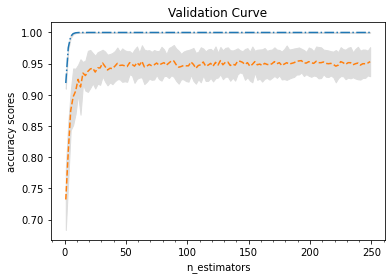

In [349]:
plt.plot(np.arange(1,250, 2),train_mean, '-.', label='train score')
plt.plot(np.arange(1,250, 2), test_mean, '--', label='test score')
plt.fill_between(np.arange(1,250, 2), train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(np.arange(1,250, 2), test_mean-test_std,test_mean+test_std, color='#DDDDDD' )
plt.xlabel('n_estimators')
plt.ylabel('accuracy scores')
plt.title('Validation Curve')
ax= plt.gca()
ax.xaxis.set_minor_locator(plt.MultipleLocator(10));